In [1]:
from module.cleverhans_model_v2 import AttackModel, Attacker, CleverhansModel
from module.utils import * 
from cleverhans.attacks import FastGradientMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
batch_shape = (110, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

In [3]:
name = 'inception_v1'
A = Attacker(batch_shape, 110, name=name)
#A.name = name
A.load(name=name)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 33.62 s
inception_v1 predict runs: 18.34 s
inception_v1 predict accuracy : 0.06363636255264282
inception_v1 adv accuracy : 0.06363636255264282, L2 25.44385028931669


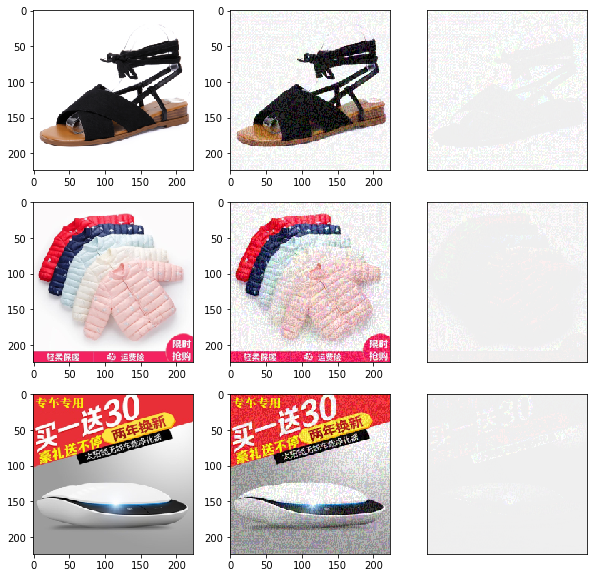

In [10]:
attack_params = {"eps":32.0 / 255.0,  "clip_min": None, "clip_max": None}
Xadv, _ = A.attack(X, Y, FastGradientMethod, attack_params, None)
plot_images(X, Xadv, n=3)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 399.00 s
inception_v1 predict runs: 13.63 s
inception_v1 predict accuracy : 0.9636363387107849
inception_v1 adv accuracy : 0.9636363387107849, L2 0.0446773539809331


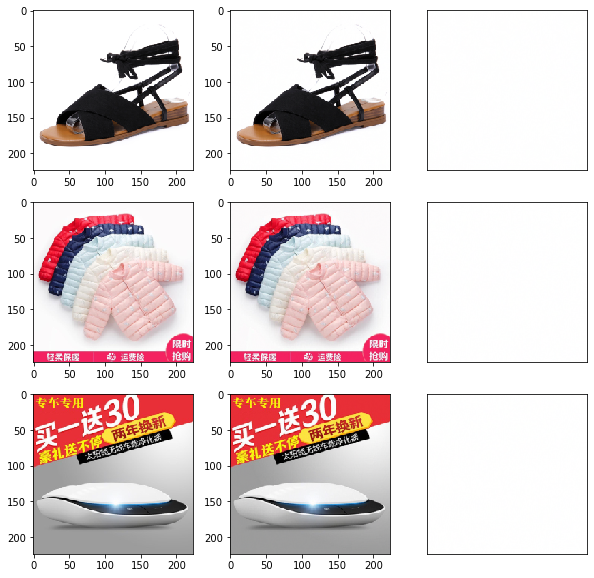

In [4]:
attack_params = {"eps": 32.0 / 255.0, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y, 'ord':2}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, None)
plot_images(X, Xadv, n=3)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 389.38 s
inception_v1 predict runs: 13.91 s
inception_v1 predict accuracy : 0.0
inception_v1 adv accuracy : 0.0, L2 20.317433896425737


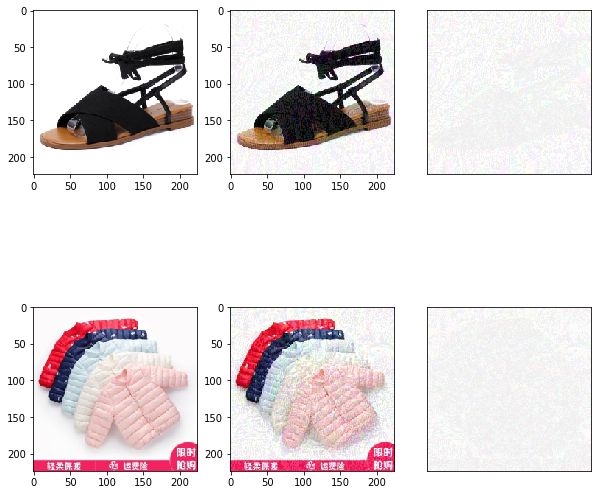

In [9]:
attack_params = {"eps": 32.0 / 255.0, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, None)
plot_images(X, Xadv, n=3)

In [10]:
name = 'resnetv1_50'
A = Attacker(batch_shape, 110, name=name)
#A.name = name
A.load(name=name)

INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 attack runs: 962.48 s
resnetv1_50 predict runs: 20.08 s
resnetv1_50 predict accuracy : 0.4363636374473572
resnetv1_50 adv accuracy : 0.4363636374473572, L2 22.213013952791293


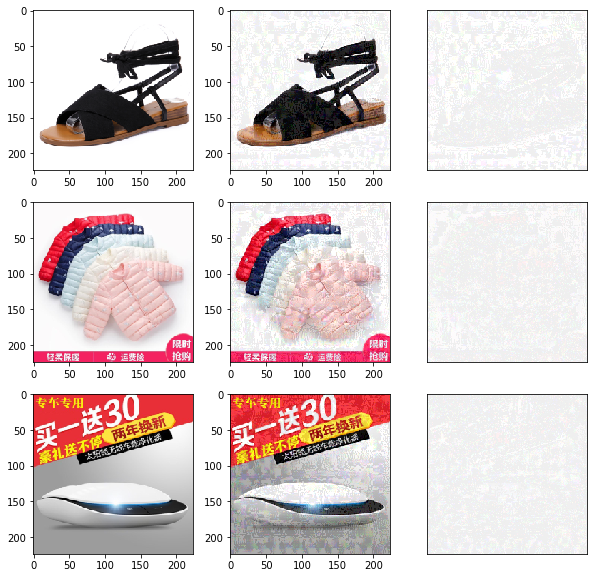

In [11]:
attack_params = {"eps": 32.0 / 255.0, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, '(-1,1)')
plot_images(X, Xadv, n=3)